# Assignment 4

## *How should I price auto insurance in the United States?*

## Introduction

**Business Context.** The ability to price an insurance quote properly has a significant impact on insurers' management decisions and financial statements. You are the chief data scientist at a new startup insurance company focusing on providing affordable insurance to millennials. You are tasked to assess the current state of insurance companies to see what factors large insurance providers charge premiums for. Fortunately for you, your company has compiled a dataset by surveying what people currently pay for insurance from large companies. Your findings will be used as the basis of developing your company's millenial car insurance offering. 

**Business Problem.** Your task is to build a **minimal** model to predict the cost of insurance from the data set using various characteristics of a policyholder.

**Analytical Context.** The data resides in a CSV file which has been pre-cleaned for you and can directly be read in. Throughout the case, you will be iterating on your initial model many times based on common pitfalls that arise which we discussed in previous cases. You will be using the Python `statsmodels` package to create and analyze these linear models.

In [2]:
### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

## Diving into the data

In [3]:
df = pd.read_csv('Allstate-cost-cleaned.csv',
    dtype = { # indicate categorical variables
        'A': 'category',
        'B': 'category',
        'C': 'category',
        'D': 'category',
        'E': 'category',
        'F': 'category',
        'G': 'category',
        'car_value': 'category',
        'state': 'category'
    }
)

The following are the columns in the dataset:

1. **state**: State where shopping point occurred
2. **group_size**: How many people will be covered under the policy (1, 2, 3 or 4) 
3. **homeowner**: Whether the customer owns a home (0=no, 1=yes)
4. **car_age**: Age of the customer's car (How old the car is)
5. **car_value**: Value of the car when it was new
6. **risk_factor**: An ordinal assessment of how risky the customer is (0,1, 2, 3, 4) 
7. **age_oldest**: Age of the oldest person in customer's group
8. **age_youngest**: Age of the youngest person in customer's group
9. **married_couple**: Does the customer group contain a married couple (0=no, 1=yes) 
10. **C_previous**: What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)
11. **duration_previous**: How long (in years) the customer was covered by their previous issuer
12. **A,B,C,D,E,F,G**: The coverage options:
13. **A**: Collision (levels: 0, 1, 2);
14. **B**: Towing (levels: 0, 1);
15. **C**: Bodily Injury (BI, levels: 1, 2, 3, 4);
16. **D**: Property Damage (PD, levels 1, 2, 3);
17. **E**: Rental Reimbursement (RR, levels: 0, 1);
18. **F**: Comprehensive (Comp, levels: 0, 1, 2, 3);
19. **G**: Medical/Personal Injury Protection (Med/PIP, levels: 1, 2, 3, 4)
20. **cost**: cost of the quoted coverage options 

In [4]:
df.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,0,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,0,0,1,1,0,0,4,543
1,1,OK,1,0,9,f,0.0,24,24,0,3.0,9.0,2,1,1,3,1,3,2,611
2,2,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,691
3,3,PA,1,1,7,f,0.0,74,74,0,2.0,15.0,2,0,2,3,1,2,2,695
4,4,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,1,1,0,2,2,628
5,5,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,625
6,6,AR,1,0,4,d,4.0,26,26,0,3.0,1.0,1,0,2,1,0,2,2,628
7,7,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,0,0,1,1,0,0,2,596
8,8,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,711
9,9,OK,1,0,13,f,3.0,22,22,0,0.0,0.0,2,0,1,1,0,3,2,722


### Exercise 1:

Write code to visualize the relationship between cost and the following variables. Choose your plots judiciously based on what you know about each variable. Different variable types (categorical vs. numerical) should have different types of plots (e.g. scatter, boxplot, violin plot, etc.) Group your plots together using the `plt.subplot()` function.

1. `car_age`
2. `age_oldest`
3. `age_youngest`
4. `duration_previous`
5. `C_previous`
6. `homeowner`
7. `group_size`
8. `car_age`
9. Categories A-G (7 different plots)

**Answer.**

----------

In [5]:
x=df["homeowner"]
y=df["cost"]

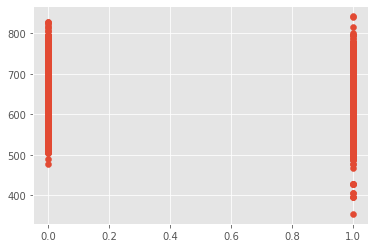

In [6]:
plt.scatter(x=x, y=y, marker='o');

<AxesSubplot:xlabel='homeowner', ylabel='cost'>

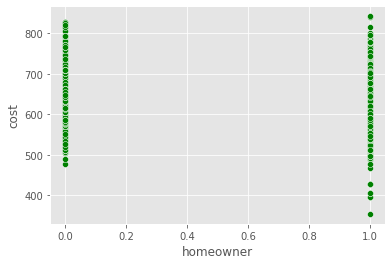

In [7]:
sns.scatterplot(x=x, y=y, color="g")

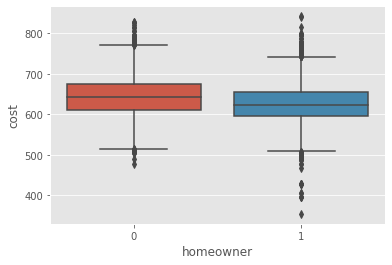

In [8]:
sns.boxplot( y=y, x=x );
plt.show()

### Exercise 2:

Convert all categorical data to be in the one-hot encoding format.

**Answer.**

----------

In [9]:
dfn=df.copy()
dfn=pd.get_dummies(dfn,columns=['state'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['homeowner'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['risk_factor'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['married_couple'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['C_previous'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['car_value'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['A'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['B'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['C'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['D'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['E'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['F'],drop_first=True)
dfn=pd.get_dummies(dfn,columns=['G'],drop_first=True)
dfn.head(10)

,Unnamed: 0,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,state_AR,state_CO,state_CT,...,C_4,D_2,D_3,E_1,F_1,F_2,F_3,G_2,G_3,G_4
0,0,1,9,24,24,9.0,543,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,9,24,24,9.0,611,0,0,0,...,0,0,1,1,0,0,1,1,0,0
2,2,1,7,74,74,15.0,691,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,3,1,7,74,74,15.0,695,0,0,0,...,0,0,1,1,0,1,0,1,0,0
4,4,1,4,26,26,1.0,628,1,0,0,...,0,0,0,0,0,1,0,1,0,0
5,5,1,4,26,26,1.0,625,1,0,0,...,0,0,0,0,0,1,0,1,0,0
6,6,1,4,26,26,1.0,628,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7,7,1,13,22,22,0.0,596,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,8,1,13,22,22,0.0,711,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,9,1,13,22,22,0.0,722,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [10]:
dfn=dfn.drop(["Unnamed: 0"],axis=1)

### Exercise 3:

Split your data into training and testing sets (an 80-20 split is a good starting point).

**Note:** Keep random seed as 1337 in the code cell

## Fitting a multiple linear regression

In [11]:
y=dfn["cost"]
X=dfn.drop(["cost"],axis=1)

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(1337)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

**Answer.**

----------

### Exercise 4:

#### 4.1

Fit a multiple linear regression model to the training data regressing cost against all the other variables. Call this `model_all`. What is the AIC value?

**Answer.**

## AIC value is 132684

----------

In [42]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
regr = OLS(y_train, x_train).fit()
model_all=regr


In [14]:
print(regr.aic)

132684.52157722565


#### 4.2 

According to `model_all`, which states are most and least expensive?

**Answer.**

state_DC  is most expensive 


state_IA  is least expensive

----------

In [15]:
print(regr.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.608e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:05:46   Log-Likelihood:                         -66269.
No. Observations:               12386   AIC:                                  1.327e+05
Df Residuals:                   12313   BIC:                                  1.332e+05
Df Model:                          73                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [16]:
regr.params[6:41].max()
regr.params[6:41].min()

-13.53267350426955

#### 4.3

Interpret the coefficients of `group_size`, `homeowner`, `car_age`, `risk_factor`, `age_oldest`, `age_youngest`       `married_couple` , `duration_previous`. Do the signs and values of these coefficients make sense to you in the context of this business problem?

**Answer.**
Yes, it makes sense to me that

The group size increase , the cost increase ( true)

The homeowner have less cost ( true), because they can have home insurance included with this insurance. 

The oldest one have high risk, so the cost is higher. (True)

The younges have lower risk, so the cost is cheaper (True)

married coupld has lower couple (true). 

the more people stay with the insurance, the less fraud occurs, so the insurance will be cheaper. (true)-duration_previous



----------

### Exercise 5:

Which variables from `model_all` are statistically significant? (For categorical variables, consider them to be significant if at least one of their categories are statistically significant). Refit the model using only these variables; call this `model_sig`. How does this model compare to the previous model?

**Answer.**
Because there is no significant variables, there is no chance to model above.So, the model_all is the same as model_sig

In [43]:
model_sig=model_all

----------

### Exercise 6:

In addition to the variables in `model_sig`, add terms for:

1. square of `age_youngest`
2. square term for the age of the car
3. interaction term for `car_value` and `age_youngest`

and save it to a new model `model_sig_plus`.

**Answer.**

----------

In [45]:
dft=df.copy()

In [46]:
dft['square_age_youngest']=df['age_youngest']^2
dft['square_car_age']=df['car_age']^2
dft['interaction']=df['age_youngest']*df['car_age']

## Feature selection

To reduce the number of features, it can often be helpful to aggregate the categories; for example, we can create a new variable by assigning each state to a larger region:

In [47]:
state_regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
# should download the above file
state_regions

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


### Exercise 7:

#### 7.1

Create a new column where a state is replaced with the region it is in according to the above table.

**Answer.**

----------

In [48]:
dicre = dict(zip(state_regions['State Code'], state_regions['Region']))

In [50]:
dft["region"]=[*map(dicre.get,dft['state'])]

In [51]:
dft.head(10)

,Unnamed: 0,state,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,...,C,D,E,F,G,cost,square_age_youngest,square_car_age,interaction,region
0,0,OK,1,0,9,f,0.0,24,24,0,...,1,1,0,0,4,543,26,11,216,South
1,1,OK,1,0,9,f,0.0,24,24,0,...,1,3,1,3,2,611,26,11,216,South
2,2,PA,1,1,7,f,0.0,74,74,0,...,2,3,1,2,2,691,72,5,518,Northeast
3,3,PA,1,1,7,f,0.0,74,74,0,...,2,3,1,2,2,695,72,5,518,Northeast
4,4,AR,1,0,4,d,4.0,26,26,0,...,1,1,0,2,2,628,24,6,104,South
5,5,AR,1,0,4,d,4.0,26,26,0,...,2,1,0,2,2,625,24,6,104,South
6,6,AR,1,0,4,d,4.0,26,26,0,...,2,1,0,2,2,628,24,6,104,South
7,7,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,0,2,596,20,15,286,South
8,8,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,3,2,711,20,15,286,South
9,9,OK,1,0,13,f,3.0,22,22,0,...,1,1,0,3,2,722,20,15,286,South


#### 7.2

Fit the model as in `model_sig_plus` but this time use `region` instead of `state`. Call this `model_region`.

**Answer.**

----------

In [52]:
dft=dft.drop("state",axis=1)
dft=dft.drop("Unnamed: 0",axis=1)

In [53]:
dft.head(10)

,group_size,homeowner,car_age,car_value,risk_factor,age_oldest,age_youngest,married_couple,C_previous,duration_previous,...,C,D,E,F,G,cost,square_age_youngest,square_car_age,interaction,region
0,1,0,9,f,0.0,24,24,0,3.0,9.0,...,1,1,0,0,4,543,26,11,216,South
1,1,0,9,f,0.0,24,24,0,3.0,9.0,...,1,3,1,3,2,611,26,11,216,South
2,1,1,7,f,0.0,74,74,0,2.0,15.0,...,2,3,1,2,2,691,72,5,518,Northeast
3,1,1,7,f,0.0,74,74,0,2.0,15.0,...,2,3,1,2,2,695,72,5,518,Northeast
4,1,0,4,d,4.0,26,26,0,3.0,1.0,...,1,1,0,2,2,628,24,6,104,South
5,1,0,4,d,4.0,26,26,0,3.0,1.0,...,2,1,0,2,2,625,24,6,104,South
6,1,0,4,d,4.0,26,26,0,3.0,1.0,...,2,1,0,2,2,628,24,6,104,South
7,1,0,13,f,3.0,22,22,0,0.0,0.0,...,1,1,0,0,2,596,20,15,286,South
8,1,0,13,f,3.0,22,22,0,0.0,0.0,...,1,1,0,3,2,711,20,15,286,South
9,1,0,13,f,3.0,22,22,0,0.0,0.0,...,1,1,0,3,2,722,20,15,286,South


In [54]:

dft=pd.get_dummies(dft,columns=['region'],drop_first=True)
dft=pd.get_dummies(dft,columns=['homeowner'],drop_first=True)
dft=pd.get_dummies(dft,columns=['risk_factor'],drop_first=True)
dft=pd.get_dummies(dft,columns=['married_couple'],drop_first=True)
dft=pd.get_dummies(dft,columns=['C_previous'],drop_first=True)
dft=pd.get_dummies(dft,columns=['car_value'],drop_first=True)
dft=pd.get_dummies(dft,columns=['A'],drop_first=True)
dft=pd.get_dummies(dft,columns=['B'],drop_first=True)
dft=pd.get_dummies(dft,columns=['C'],drop_first=True)
dft=pd.get_dummies(dft,columns=['D'],drop_first=True)
dft=pd.get_dummies(dft,columns=['E'],drop_first=True)
dft=pd.get_dummies(dft,columns=['F'],drop_first=True)
dft=pd.get_dummies(dft,columns=['G'],drop_first=True)
dft.head(10)

,group_size,car_age,age_oldest,age_youngest,duration_previous,cost,square_age_youngest,square_car_age,interaction,region_Northeast,...,C_4,D_2,D_3,E_1,F_1,F_2,F_3,G_2,G_3,G_4
0,1,9,24,24,9.0,543,26,11,216,0,...,0,0,0,0,0,0,0,0,0,1
1,1,9,24,24,9.0,611,26,11,216,0,...,0,0,1,1,0,0,1,1,0,0
2,1,7,74,74,15.0,691,72,5,518,1,...,0,0,1,1,0,1,0,1,0,0
3,1,7,74,74,15.0,695,72,5,518,1,...,0,0,1,1,0,1,0,1,0,0
4,1,4,26,26,1.0,628,24,6,104,0,...,0,0,0,0,0,1,0,1,0,0
5,1,4,26,26,1.0,625,24,6,104,0,...,0,0,0,0,0,1,0,1,0,0
6,1,4,26,26,1.0,628,24,6,104,0,...,0,0,0,0,0,1,0,1,0,0
7,1,13,22,22,0.0,596,20,15,286,0,...,0,0,0,0,0,0,0,1,0,0
8,1,13,22,22,0.0,711,20,15,286,0,...,0,0,0,0,0,0,1,1,0,0
9,1,13,22,22,0.0,722,20,15,286,0,...,0,0,0,0,0,0,1,1,0,0


In [55]:
y=dft["cost"]
x=dft.drop(["cost"],axis=1)
from sklearn.model_selection import train_test_split
np.random.seed(1337)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)


In [56]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
model_region = OLS(y_train, x_train).fit()


In [57]:
print(model_region.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          4.006e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:12:59   Log-Likelihood:                         -66756.
No. Observations:               12386   AIC:                                  1.336e+05
Df Residuals:                   12342   BIC:                                  1.339e+05
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### Exercise 8:

#### 8.1

What should we do next to minimize features?

**Answer.**

To minimize featrue, we can use larger domains. For examples,If current categoricals are countries, we can group all these countries to a region(Asian,Western Countries).Therefore, the features were reduced.
Another method is removing redundant variables. 

----------

#### 8.2

Using a method of your choice, find the numerical feature(s) in `model_region`, except for the three we added in Exercise 6, which exhibit multicollinearity. **Hint:** consider looking at correlations.

**Answer.**

----------

From the plot below, I found the muliticolinearity between age oldest and age youngest. Two dist variable has linear relationship to each other.

array([[<AxesSubplot:xlabel='group_size', ylabel='group_size'>,
        <AxesSubplot:xlabel='car_age', ylabel='group_size'>,
        <AxesSubplot:xlabel='age_oldest', ylabel='group_size'>,
        <AxesSubplot:xlabel='age_youngest', ylabel='group_size'>,
        <AxesSubplot:xlabel='duration_previous', ylabel='group_size'>,
        <AxesSubplot:xlabel='cost', ylabel='group_size'>],
       [<AxesSubplot:xlabel='group_size', ylabel='car_age'>,
        <AxesSubplot:xlabel='car_age', ylabel='car_age'>,
        <AxesSubplot:xlabel='age_oldest', ylabel='car_age'>,
        <AxesSubplot:xlabel='age_youngest', ylabel='car_age'>,
        <AxesSubplot:xlabel='duration_previous', ylabel='car_age'>,
        <AxesSubplot:xlabel='cost', ylabel='car_age'>],
       [<AxesSubplot:xlabel='group_size', ylabel='age_oldest'>,
        <AxesSubplot:xlabel='car_age', ylabel='age_oldest'>,
        <AxesSubplot:xlabel='age_oldest', ylabel='age_oldest'>,
        <AxesSubplot:xlabel='age_youngest', ylabel='age_old

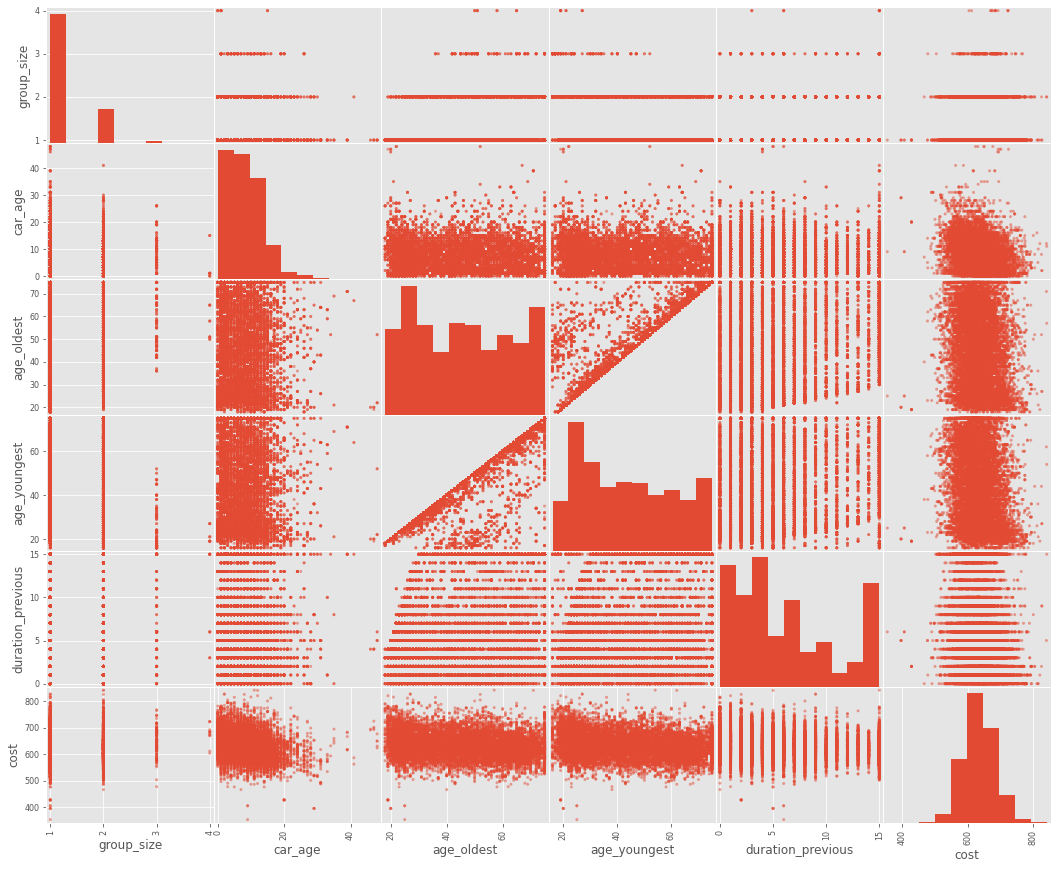

In [88]:
pd.plotting.scatter_matrix(dft.iloc[:,0:6],figsize=(18,15))

#### 8.3:

Refit `model_region` after dropping these redundant predictor(s); call this `model_region_no_oldest`.

**Answer.**

The redundant predictors are car age, age_oldest,age_youngest,duration.

----------

In [91]:
dfp=dft.drop(['car_age','age_oldest','age_youngest','duration_previous','square_age_youngest','square_car_age'],1)

C:\Users\caoth\AppData\Local\Temp/ipykernel_33948/1880798210.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfp=dft.drop(['car_age','age_oldest','age_youngest','duration_previous','square_age_youngest','square_car_age'],1)


In [92]:
dfp=dfp.drop('interaction',1)

C:\Users\caoth\AppData\Local\Temp/ipykernel_33948/2717345703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dfp=dfp.drop('interaction',1)


In [94]:
y=dfp["cost"]
x=dfp.drop(["cost"],axis=1)
from sklearn.model_selection import train_test_split
np.random.seed(1337)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)




In [95]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
model_region_no_oldest = OLS(y_train, x_train).fit()

In [96]:
print(model_region_no_oldest.summary())

                                 OLS Regression Results                                
Dep. Variable:                   cost   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          4.437e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):                        0.00
Time:                        13:17:27   Log-Likelihood:                         -67197.
No. Observations:               12386   AIC:                                  1.345e+05
Df Residuals:                   12349   BIC:                                  1.347e+05
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

#### 8.4

What would you do to diagnose the `model_region_no_oldest` fit? What does this diagnosis suggest to you? (Hint: try plotting the residuals in various ways.)

**Answer.**

The residual likely follow the normal distribution, but which has higher mean, and small variance than normal distribution. There are some residuals which between 400 and 600

----------

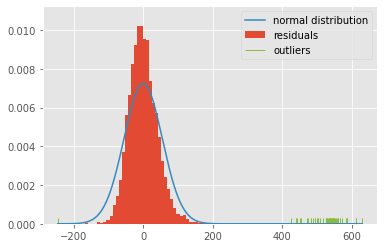

In [107]:
import statsmodels.api         as sm
import scipy
plt.hist(model_region_no_oldest.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )

xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest.scale)),
    label="normal distribution")

outliers = np.abs(model_region_no_oldest.resid)>4*np.sqrt(model_region_no_oldest.scale)
sns.rugplot(model_region_no_oldest.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")


plt.legend(loc="upper right");

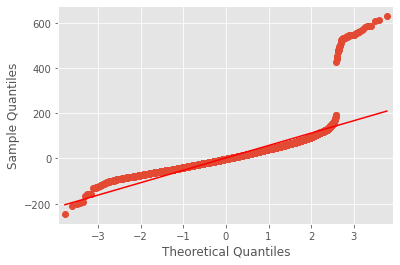

In [108]:
sm.qqplot(model_region_no_oldest.resid, line="s");

### Exercise 9:

#### 9.1

Find the best Box-Cox transformation of `cost` used to fit `model_region_no_oldest`. What value do you get?

**Answer.**

I have lambda 0.5328144668200044
----------



In [110]:
dfe=dfp.copy()

In [111]:
# import modules
import numpy as np
from scipy import stats
  
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

fitted_data, fitted_lambda = stats.boxcox(dfe['cost'])

In [112]:
fitted_lambda

0.5328144668200044

In [113]:
dfe['cost']=fitted_data

#### 9.2

Refit `model_region_no_oldest`, but now with the transformation as suggested by the Box-Cox. Call it `model_region_no_oldest_box_cox`.

**Answer.**

----------

In [114]:
y=dfe["cost"]
x=dfe.drop(["cost"],axis=1)
from sklearn.model_selection import train_test_split
np.random.seed(1337)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)



In [117]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
model_region_no_oldest_box_cox = OLS(y_train, x_train).fit()

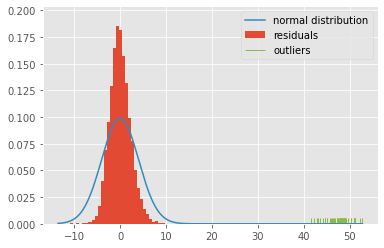

In [118]:
import statsmodels.api         as sm
import scipy
plt.hist(model_region_no_oldest_box_cox.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )

xx = np.linspace(model_region_no_oldest.resid.min(), model_region_no_oldest_box_cox.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(model_region_no_oldest_box_cox.scale)),
    label="normal distribution")

outliers = np.abs(model_region_no_oldest_box_cox.resid)>4*np.sqrt(model_region_no_oldest_box_cox.scale)
sns.rugplot(model_region_no_oldest_box_cox.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")


plt.legend(loc="upper right");

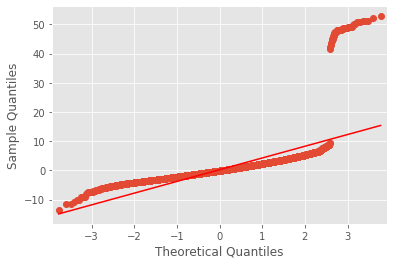

In [119]:
sm.qqplot(model_region_no_oldest_box_cox.resid, line="s");

In [120]:
# There is the improvement of fit after Box cos transformation.

## Conclusion

In this, you practiced creating linear models using `statsmodels` and iteratively trimming the input variables to go from including all the variables in the dataset to using only the most relevant variables. You excluded those variables that were statistically insignificant and removed those that had high correlation. Finally, we performed some feature engineering in an attempt to remove some tail behavior that deviates from the normal distribution to better fit our linear model. In the end, we had a very minimal model that contained variables that other insurance companies use to charge premiums that gave us insight on how we can better serve a niche population. 